### [ 3장 대표적인 이산형 확률 분포 ]  
교재 6장
1) 베르누이 분포
2) 이항분포
3) 기하분포
4) 포아송 분포

In [1]:
# [ 0. 준비 ]
# 1) 모수적 기법 : 모집단의 성질을 보고 확률 분포도 그러할 것이다 판단, 소수의 파라미터를 추측
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision %.3f
pd.set_option('display.precision', 3) 

In [19]:
# 2) 그래프에서 선의 종류 : - , --, : , -. 등
def E(X, g=lambda x:x):   # 기댓값 함수
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(X, g=lambda x:x):   # 분산 함수
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

def check_prob(X):  # 기대값, 분산 확인 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob>=0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {V(X):.4}')
    
def plot_prob(X):   # 그래프 생성 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

In [4]:
# [ 1. 베르누이 분포 ]
# 1) 확률 변수가 취하는 값이 0 또는 1 
#    : 동전 던지기
#    : 1일 확률은 p
#    
#    f(x) = p^x * (1-p)^(1-x)  (x in {0, 1})

# Ex) 동전 던지기            : P(X=1) = (1/2)^1 * (1/2)^(1-1) = 1/2
#     주사위 6이 안나올 확률 : P(X=0) = (1/6)^0 * (1-1/6)^(6-0) = 5/6

# 2) 기댓값과 분산
# (1) 기댓값 : p   (결과가 0 또는 1 -> 1*p + 0*(1-p))
# (2) 분산 : p*(1-p)

def Bern(p):
    x_set = [0, 1]
    f = lambda x: p**x * (1-p)**(1-x) if x in x_set else 0
    return x_set, f

p = 0.3
X = Bern(p)

([0, 1], <function __main__.Bern.<locals>.<lambda>(x)>)

In [11]:
# 3) scipy 함수 이용
# - scipy.stats.bernoulli 함수
import scipy.stats as stats

rv = stats.bernoulli(p)     # 베르누이 분포를 따르는 확률 변수
rv.pmf(0), rv.pmf(1)        # 확률 분포 함수; p=0.3 이므로
rv.cdf([0,1])               # 누적밀도함수 계산
rv.mean(), rv.var()         # 기댓값, 분산

(0.300, 0.210)

expected value 3.0
variance 2.1


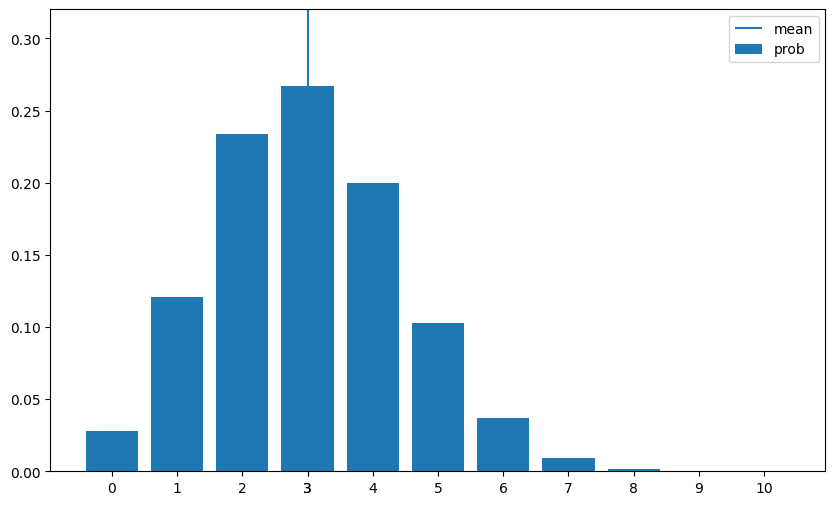

In [20]:
# [ 2. 이항분포 ]
# 1) 확률 p를 n 번 시행
#   : Bin(n,p)
#   : f(x) = nCr * p^x * (1-p)^(n-x)    x in {0, 1, ..., n}
# 
# 2) 기댓값과 분산
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    f = lambda x: comb(n, x) * (p**x) * ((1-p)**(n-x)) if x in x_set else 0
    return x_set, f

n=10; p=0.3; X=Bin(n, p)
check_prob(X)
plot_prob(X)

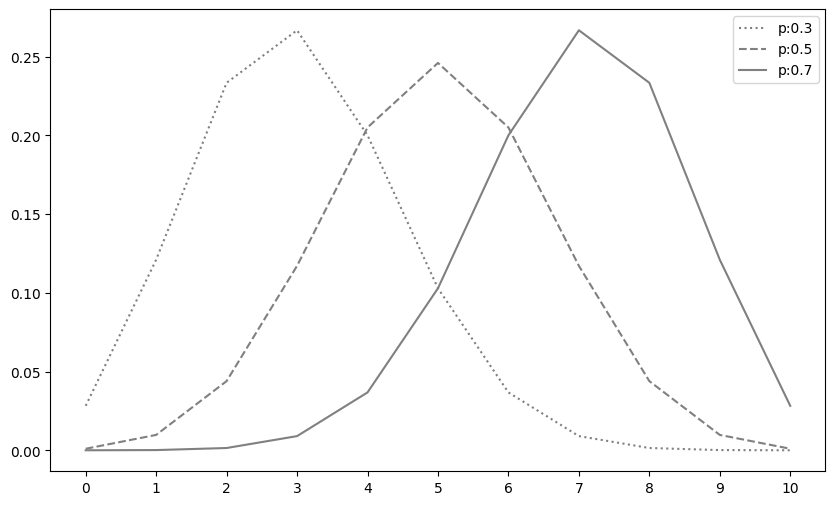

In [27]:
# 3) Binom 함수: 이항분포 생성 함수
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], [':', '--', '-']):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set), ls=ls, label=f'p:{p}', color='gray')
ax.set_xticks(x_set)
ax.legend()
plt.show()    

expected value 2.0
variance 2.0


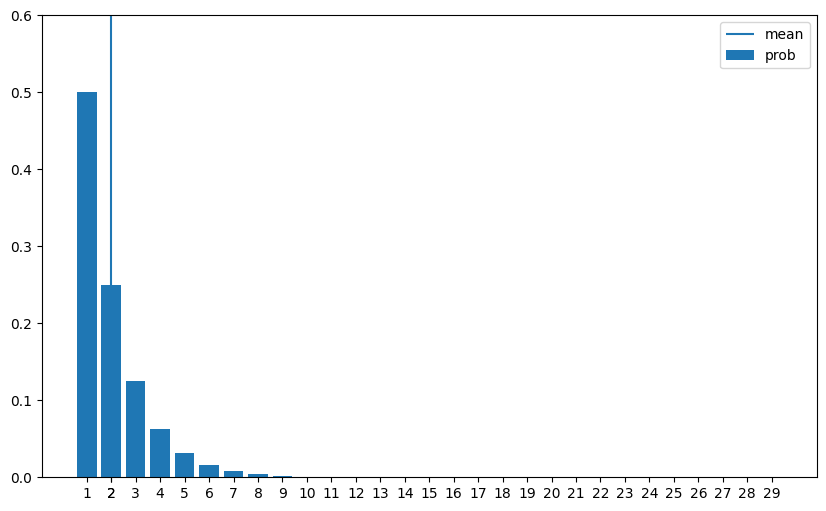

In [22]:
# [ 3. 기하 분포 ]
# 1) 처음 성공할 때까지 반복한 시행 횟수 분포
#   : Ge(p)
#   : f(x) = p(1-p)^(x-1)    x in {1, 2, ...}

# 2) 기댓값과 분산
# - 기댓값 : E(X) = 1/p
# - 분산   : V(X) = (1 - p)/p^2

def Ge(p):
    x_set = np.arange(1,30)
    f = lambda x: p*(1-p)**(x-1) if x in x_set else 0
    return x_set, f

p=0.5; X=Ge(p)
check_prob(X)
plot_prob(X)
# 그래프 : 기하급수적으로 확률은 감소

expected value 3.0
variance 3.0


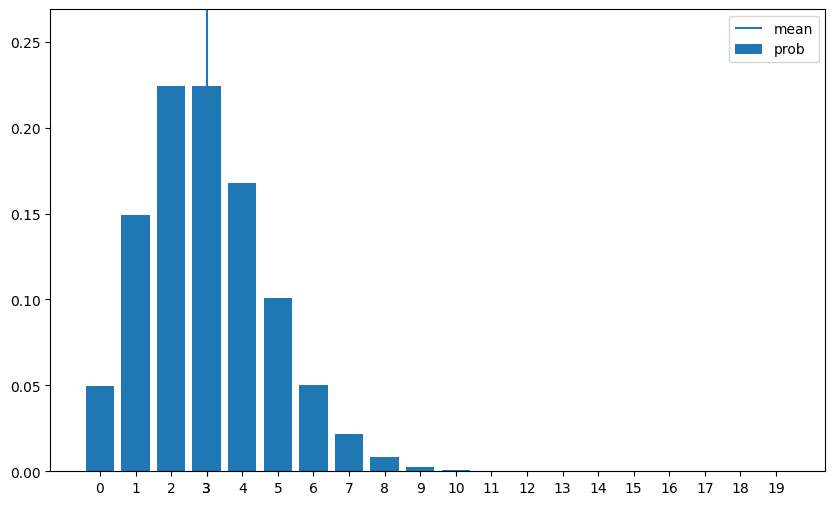

In [23]:
# [ 4. 포아송 분포 ]
# 1) 임의의 사건이 단위 시간당 발생한 건수의 확률 분포
#   : Poi(λ)
#   : f(x) = (λ^x/x!) * e^(-λ)    x in {0, 1, 2, ...}
#   : -> 단위시간당 평균 λ번 발생하는 데서 x번 일어날 확률 분포

# 2) 기댓값과 분산
#  - 기댓값 : E(X) = λ
#  - 분산   : V(X) = λ
from  scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    f = lambda x: (lam**x/factorial(x)) * np.exp(-lam) if x in x_set else 0
    return x_set, f

lam=3; X = Poi(lam)
check_prob(X)
plot_prob(X)

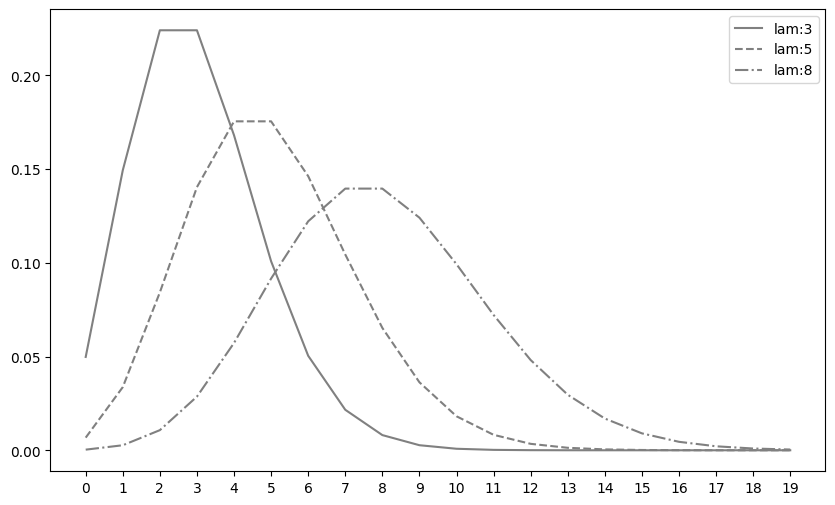

In [26]:
# lam에 따른 그래프 분포
fig = plt.figure(figsize=(10, 6))
ax =  fig.add_subplot(1, 1, 1)

x_set = np.arange(20)
for lam, ls in zip([3,5,8], ['-', '--', '-.']):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set), ls=ls, label= f'lam:{lam}', color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()